In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
from cycler import cycle

In [3]:
"OBTAINING A LIST OF AUDIO FILES"
personal_files = glob(".\me_wav\*.wav")
other_files = glob(".\others_wav\*.wav")

In [4]:
#Creating raw data arrays
raw_data_personal = []
raw_data_others = []
sr_others = []
sr_personal = []

#Filling arrays with raw data and sampling rate
for audio_files in personal_files:  
    raw_data, sr = librosa.load(audio_files)
    raw_data_personal.append(raw_data)
    sr_personal.append(sr)
for audio_files in other_files:  
    raw_data, sr = librosa.load(audio_files)
    raw_data_others.append(raw_data)
    sr_others.append(sr)

In [5]:
# Trimming data
raw_data_personal_trimmed = []
raw_data_others_trimmed = []
for raws in raw_data_personal:
    y_trimmed, _= librosa.effects.trim(raws, top_db=20)
    raw_data_personal_trimmed.append(y_trimmed)
for raws in raw_data_others:
    y_trimmed, _= librosa.effects.trim(raws, top_db=20)
    raw_data_others_trimmed.append(y_trimmed)

In [6]:
#CREATING A MEL SPECTROGRAM DATA FILES 
mel_personal = []
mel_others = []
for raws in raw_data_personal_trimmed:
    S = librosa.feature.melspectrogram(raws, sr=sr, n_mels=128*2)
    S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    mel_personal.append(S_db_mel)
for raws in raw_data_others_trimmed:
    S = librosa.feature.melspectrogram(raws, sr=sr, n_mels=128*2)
    S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    mel_others.append(S_db_mel)

C:\Users\hurta\AppData\Local\Temp\ipykernel_13404\2772139000.py:5: FutureWarning: Pass y=[-0.02046252 -0.02695574 -0.0248065  ... -0.00917185 -0.01534278
 -0.01866718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(raws, sr=sr, n_mels=128*2)
C:\Users\hurta\AppData\Local\Temp\ipykernel_13404\2772139000.py:5: FutureWarning: Pass y=[-0.03506571 -0.04264766 -0.04121462 ... -0.00039696 -0.00039198
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(raws, sr=sr, n_mels=128*2)
C:\Users\hurta\AppData\Local\Temp\ipykernel_13404\2772139000.py:5: FutureWarning: Pass y=[-0.00550027 -0.0052921  -0.00439468 ...  0.01224826  0.01526697
  0.01567886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(raws, sr=sr, n_mels=128*2)
C:\Users\hurt

106


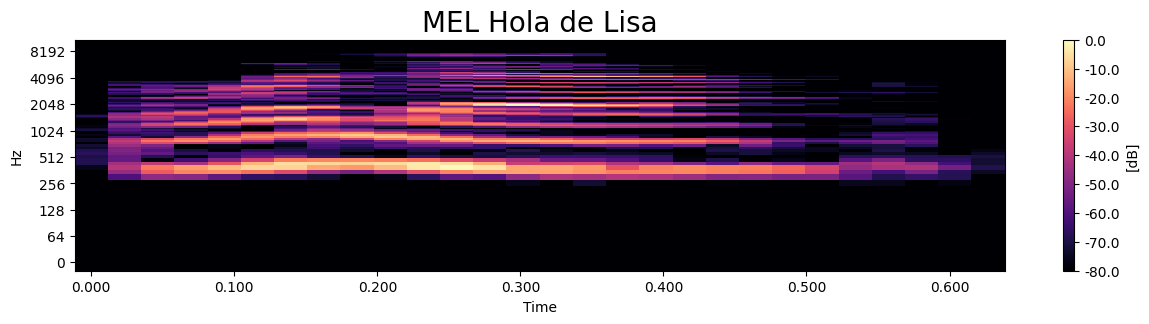

In [29]:
print(len(mel_personal))
fig, ax = plt.subplots(figsize=(15,3))
img = librosa.display.specshow(mel_personal[5], x_axis='time', y_axis='log', ax=ax)
ax.set_title('MEL Hola de Lisa', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.1f', label='[dB]')